In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
test = pd.read_csv('test_df.csv')
train = pd.read_csv('train_df.csv')

In [3]:
train.columns

Index(['domain', 'country_code', 'num_funding_rounds', 'total_funding_usd',
       'founded_on', 'last_funding_on', 'closed_on', 'employee_count',
       'num_exits', 'b_round_raised_amount_usd', 'ipo_money_raised_usd',
       'is_tech', 'b_round_age', 'ipo_age', 'acquired_age', 'target'],
      dtype='object')

Посмотрим, какие признаки можно назвать существенными прогнозирующими факторами

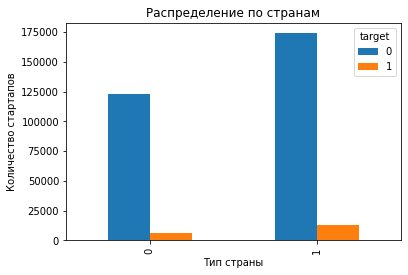

In [4]:
pd.crosstab(train.country_code, train.target).plot(kind = 'bar')
#table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Распределение по странам')
plt.xlabel('Тип страны')
plt.ylabel('Количество стартапов')
plt.savefig('country_code')

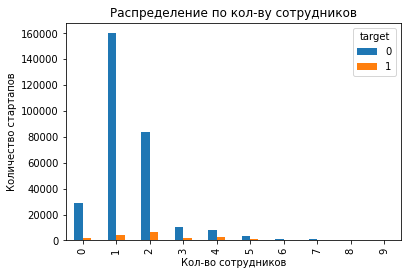

In [5]:
pd.crosstab(train.employee_count, train.target).plot(kind='bar')
plt.title('Распределение по кол-ву сотрудников')
plt.xlabel('Кол-во сотрудников')
plt.ylabel('Количество стартапов')
plt.savefig('employee_count')

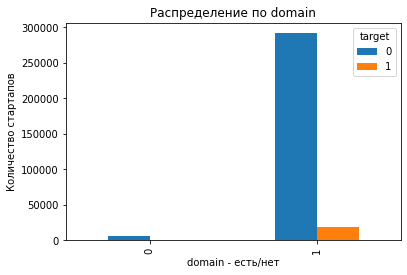

In [6]:
pd.crosstab(train.domain, train.target).plot(kind='bar')
plt.title('Распределение по domain')
plt.xlabel('domain - есть/нет')
plt.ylabel('Количество стартапов')
plt.savefig('domain')

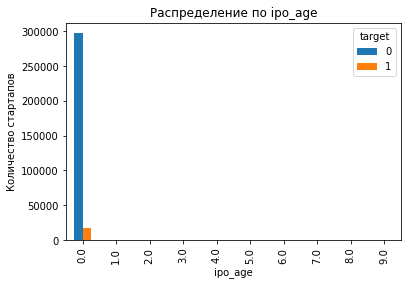

In [7]:
pd.crosstab(train.ipo_age, train.target).plot(kind='bar')
plt.title('Распределение по ipo_age')
plt.xlabel('ipo_age')
plt.ylabel('Количество стартапов')
plt.savefig('ipo_age')



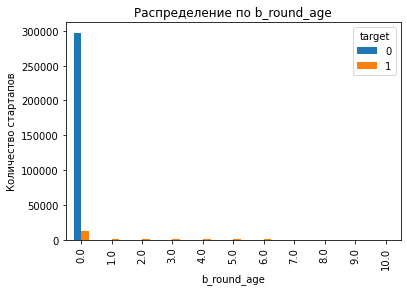

In [8]:
pd.crosstab(train.b_round_age, train.target).plot(kind='bar')
plt.title('Распределение по b_round_age')
plt.xlabel('b_round_age')
plt.ylabel('Количество стартапов')
plt.savefig('b_round_age')

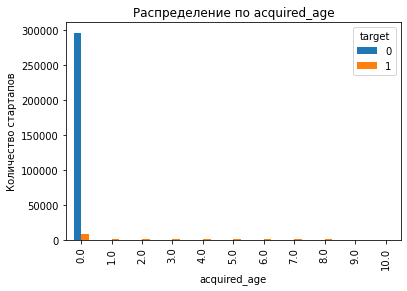

In [9]:
pd.crosstab(train.acquired_age, train.target).plot(kind='bar')
plt.title('Распределение по acquired_age')
plt.xlabel('acquired_age')
plt.ylabel('Количество стартапов')
plt.savefig('acquired_age')

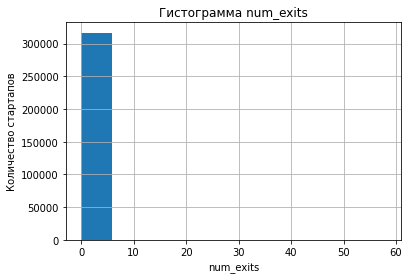

In [10]:
train['num_exits'].hist()
plt.title('Гистограмма num_exits')
plt.xlabel('num_exits')
plt.ylabel('Количество стартапов')
plt.savefig('hist_num_exits')

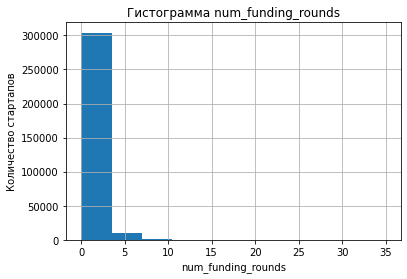

In [11]:
train['num_funding_rounds'].hist()
plt.title('Гистограмма num_funding_rounds')
plt.xlabel('num_funding_rounds')
plt.ylabel('Количество стартапов')
plt.savefig('hist_num_funding_rounds')

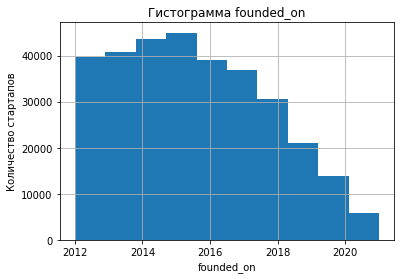

In [12]:
train['founded_on'].hist()
plt.title('Гистограмма founded_on')
plt.xlabel('founded_on')
plt.ylabel('Количество стартапов')
plt.savefig('hist_founded_on')

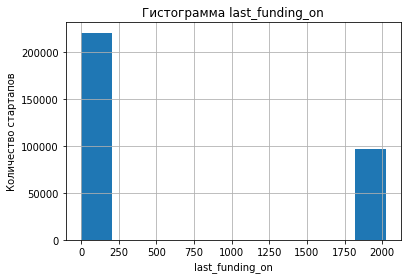

In [13]:
train['last_funding_on'].hist()
plt.title('Гистограмма last_funding_on')
plt.xlabel('last_funding_on')
plt.ylabel('Количество стартапов')
plt.savefig('hist_last_funding_on')

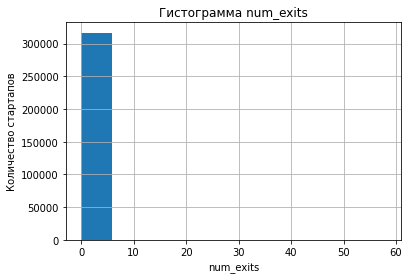

In [14]:
train['num_exits'].hist()
plt.title('Гистограмма num_exits')
plt.xlabel('num_exits')
plt.ylabel('Количество стартапов')
plt.savefig('hist_num_exits')

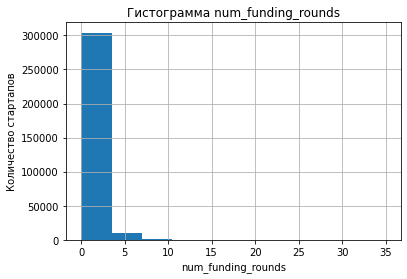

In [15]:
train['num_funding_rounds'].hist()
plt.title('Гистограмма num_funding_rounds')
plt.xlabel('num_funding_rounds')
plt.ylabel('Количество стартапов')
plt.savefig('hist_num_funding_rounds')

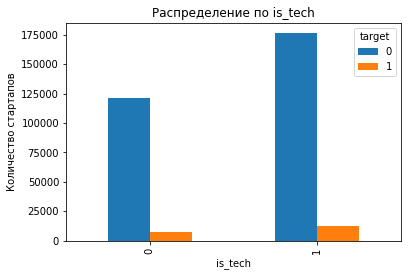

In [16]:
pd.crosstab(train.is_tech, train.target).plot(kind='bar')
plt.title('Распределение по is_tech')
plt.xlabel('is_tech')
plt.ylabel('Количество стартапов')
plt.savefig('is_tech')

Вывод: будем прогнозировать по всем, кроме country_code, ipo_age и num_exists.

In [4]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
to_keep = ['domain', 'num_funding_rounds',
       'total_funding_usd', 'founded_on', 'last_funding_on',
       'employee_count', 'b_round_age', 'acquired_age', 'is_tech',
       'target']
data_final_train = train[to_keep]
data_final_test = test[to_keep]

In [5]:
y = data_final_train['target']
X = data_final_train.drop(['target'], axis = 1)

test_y = data_final_test['target']
test_X = data_final_test.drop(['target'], axis = 1)

In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)


In [7]:
logreg = LogisticRegression()

In [21]:
param_grid = [
    {'C': np.logspace(-3, 1.5, 10), 'penalty': ['l1'], 'solver' : ['liblinear']},    
    {'C': np.logspace(-3, 1.5, 10), 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs']}]

In [22]:
gridsearch_f = GridSearchCV(logreg, param_grid, scoring='f1', cv=5)
gridsearch_f.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01]),
                          'penalty': ['l1'], 'solver': ['liblinear']},
                         {'C': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01]),
                          'penalty': ['l2'],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs']}],
             scoring='f1')

In [23]:
print("Tuned Hyperparameters :", gridsearch_f.best_params_)
print("F1 :", gridsearch_f.best_score_)

Tuned Hyperparameters : {'C': 3.1622776601683795, 'penalty': 'l1', 'solver': 'liblinear'}
F1 : 0.8602539207099162


In [24]:
gridsearch = GridSearchCV(logreg, param_grid, scoring='accuracy', cv=5)
gridsearch.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01]),
                          'penalty': ['l1'], 'solver': ['liblinear']},
                         {'C': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01]),
                          'penalty': ['l2'],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs']}],
             scoring='accuracy')

In [25]:
print("Tuned Hyperparameters :", gridsearch.best_params_)
print("Accuracy :", gridsearch.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9846098464675622


ROC AUC

In [21]:
model_f = LogisticRegression(C=3.1622776601683795, penalty='l1', solver='liblinear')
model_f.fit(test_X, test_y)

LogisticRegression(C=3.1622776601683795, penalty='l1', solver='liblinear')

In [23]:
y_pred = model_f.predict(test_X)

In [25]:
print(f1_score(test_y, y_pred))

0.8529133316120148


In [26]:
print(model_f.score(test_X, test_y))

0.9838043251644207


In [16]:
probs = model_f.predict_proba(test_X)[:,1]

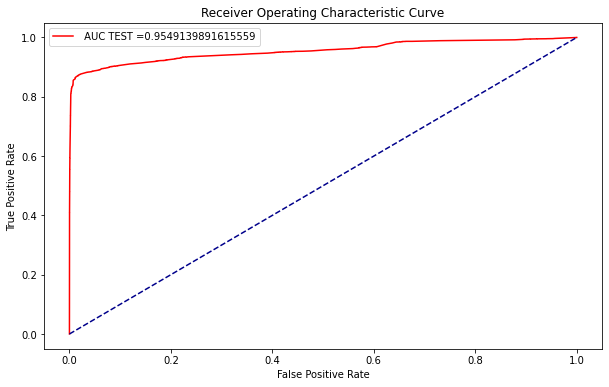

In [19]:
fpr, tpr, thresholds = roc_curve(test_y, probs)

plt.figure(figsize = (10,6))
plt.plot(fpr, tpr, color='red', label=" AUC TEST ="+str(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.savefig('logreg.png')
plt.show()


In [18]:
lr_auc = roc_auc_score(test_y, probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.955
